<a href="https://colab.research.google.com/github/won195/TIL/blob/master/0301_%E1%84%82%E1%85%A5%E1%86%B7%E1%84%91%E1%85%A1%E1%84%8B%E1%85%B5_NumPy_%EB%94%A5%EB%9F%AC%EB%8B%9D_%E1%84%89%E1%85%A9%E1%86%AB%E1%84%80%E1%85%B3%E1%86%AF%E1%84%8A%E1%85%B5_%E1%84%8B%E1%85%B5%E1%84%86%E1%85%B5%E1%84%8C%E1%85%B5_MNIST_%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%E1%84%89%E1%85%A6%E1%86%BA_%E1%84%85%E1%85%A9%E1%84%83%E1%85%B3%E1%84%8B%E1%85%AA_%E1%84%8C%E1%85%A5%E1%86%BC%E1%84%83%E1%85%A1%E1%86%B8_%E1%84%8B%E1%85%AF%E1%86%AB%E1%84%92%E1%85%A1%E1%86%BA%E1%84%8B%E1%85%B5%E1%86%AB%E1%84%8F%E1%85%A9%E1%84%83%E1%85%B5%E1%86%BC%EC%9C%BC%EB%A1%9C_%EB%B0%94%EA%BE%B8%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
data_sources = {
    "training_images": "train-images-idx3-ubyte.gz",  # 60,000 training images.
    "test_images": "t10k-images-idx3-ubyte.gz",  # 10,000 test images.
    "training_labels": "train-labels-idx1-ubyte.gz",  # 60,000 training labels.
    "test_labels": "t10k-labels-idx1-ubyte.gz",  # 10,000 test labels.
}

In [34]:
headers = {
    "User-Agent" : "Mozilla/5.0 (X11; Linux x86_64; rv:10.0) Gecko/20100101 Firefox/10.0"
}
request_opts = {
    "headers": headers,
    "params": {"raw": "true"},
}

In [35]:
import requests
import os

data_dir = "/content/drive/MyDrive/오늘코드todaycode/data"
os.makedirs(data_dir, exist_ok=True)

base_url = "https://github.com/rossbar/numpy-tutorial-data-mirror/blob/main/"

for fname in data_sources.values():
    fpath = os.path.join(data_dir, fname)
    if not os.path.exists(fpath):
        print("Downloading file: " + fname)
        resp = requests.get(base_url + fname, stream=True, **request_opts)
        resp.raise_for_status()  # Ensure download was succesful
        with open(fpath, "wb") as fh:
            for chunk in resp.iter_content(chunk_size=128):
                fh.write(chunk)

In [38]:
import gzip
import numpy as np

mnist_dataset = {}

# Images
for key in ("training_images", "test_images"):
    with gzip.open(os.path.join(data_dir, data_sources[key]), "rb") as mnist_file:
        mnist_dataset[key] = np.frombuffer(
            mnist_file.read(), np.uint8, offset=16
        ).reshape(-1, 28 * 28)
# Labels
for key in ("training_labels", "test_labels"):
    with gzip.open(os.path.join(data_dir, data_sources[key]), "rb") as mnist_file:
        mnist_dataset[key] = np.frombuffer(mnist_file.read(), np.uint8, offset=8)

In [40]:
x_train, y_train, x_test, y_test = (
    mnist_dataset["training_images"],
    mnist_dataset["training_labels"],
    mnist_dataset["test_images"],
    mnist_dataset["test_labels"],
)

In [41]:
print(
    "The shape of training images: {} and training labels: {}".format(
        x_train.shape, y_train.shape
    )
)
print(
    "The shape of test images: {} and test labels: {}".format(
        x_test.shape, y_test.shape
    )
)

The shape of training images: (60000, 784) and training labels: (60000,)
The shape of test images: (10000, 784) and test labels: (10000,)


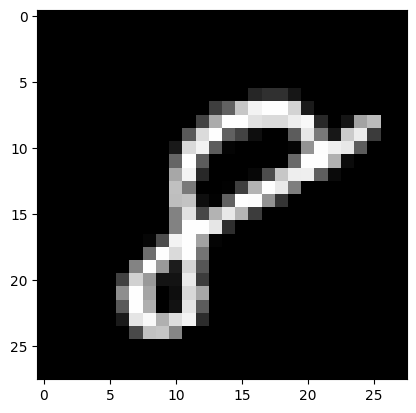

In [42]:
import matplotlib.pyplot as plt

# Take the 60,000th image (indexed at 59,999) from the training set,
# reshape from (784, ) to (28, 28) to have a valid shape for displaying purposes.
mnist_image = x_train[59999, :].reshape(28, 28)
# Set the color mapping to grayscale to have a black background.
plt.imshow(mnist_image, cmap="gray")
# Display the image.
plt.show()

In [49]:
np.sqrt(x_train[0].shape[0]) ** 2

784.0

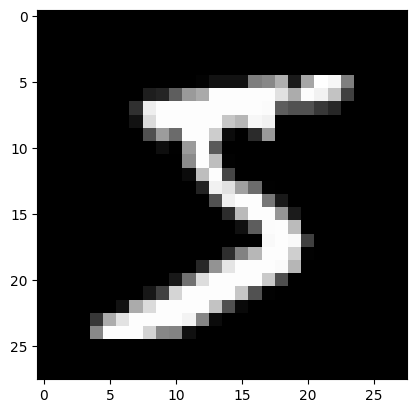

In [52]:
plt.imshow(x_train[0].reshape(28, 28), cmap="gray")

In [53]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

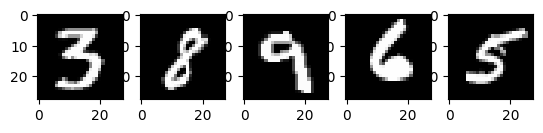

In [54]:
num_examples = 5
seed = 147197952744
rng = np.random.default_rng(seed)

fig, axes = plt.subplots(1, num_examples)
for sample, ax in zip(rng.choice(x_train, size=num_examples, replace=False), axes):
  ax.imshow(sample.reshape(28, 28), cmap="gray")

In [57]:
y_train[59999]

8

In [58]:
print("The data type of traning images: {}".format(x_train.dtype))
print("The data type of test images: {}".format(x_train.dtype))

The data type of traning images: uint8
The data type of test images: uint8


In [59]:
training_sample, test_sample = 1000, 1000
training_images = x_train[0:training_sample] / 255
test_images = x_test[0:test_sample] / 255

In [61]:
print("The data type of traning images: {}".format(training_images.dtype))
print("The data type of test images: {}".format(test_images.dtype))

The data type of traning images: float64
The data type of test images: float64


In [64]:
def one_hot_encoding(labels, dimension=10):
    # Define a one-hot variable for an all-zero vector
    # with 10 dimensions (number labels from 0 to 9).
    one_hot_labels = labels[..., None] == np.arange(dimension)[None]
    # Return one-hot encoded labels.
    return one_hot_labels.astype(np.float64)

In [65]:
training_labels = one_hot_encoding(y_train[:training_sample])
test_labels = one_hot_encoding(y_test[:test_sample])

In [66]:
training_labels.shape

(1000, 10)

In [67]:
training_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [68]:
print("The data type of traning images: {}".format(training_images.dtype))
print("The data type of test images: {}".format(test_images.dtype))

The data type of traning images: float64
The data type of test images: float64


In [69]:
print(training_labels[0])
print(training_labels[1])
print(training_labels[2])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [70]:
print(y_train[0])
print(y_train[1])
print(y_train[2])

5
0
4


In [71]:
seed = 884736743
rng = np.random.default_rng(seed)
rng

Generator(PCG64) at 0x7BC16A551B60

In [72]:
def relu(x):
  return (x >= 0) * x

def relu2deriv(output):
  return output >= 0

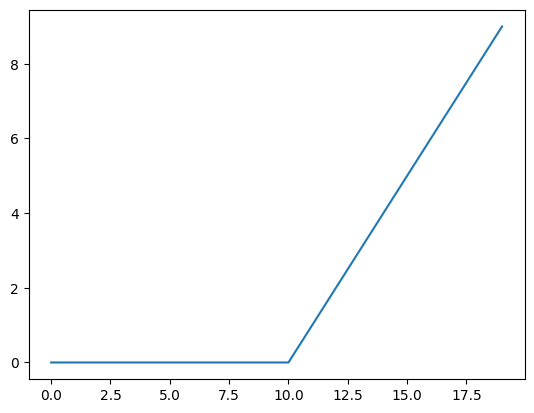

In [75]:
a = np.arange(-10, 10)
plt.plot(relu(a))

In [76]:
relu2deriv(a)

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [77]:
learning_rate = 0.005
epochs = 20
hidden_size = 100
pixels_per_image = 784
num_labels = 10

In [78]:
weights_1 = 0.2 * rng.random((pixels_per_image, hidden_size)) - 0.1
weights_2 = 0.2 * rng.random((hidden_size, num_labels)) - 0.1

In [79]:
0.2 * rng.random((pixels_per_image, hidden_size)) - 0.1

array([[-0.04386237,  0.04997968,  0.05969065, ..., -0.00050073,
        -0.03747507, -0.06440618],
       [ 0.06949055,  0.08666741, -0.08078108, ..., -0.03980021,
         0.07505359, -0.04722107],
       [-0.08200062,  0.05493642,  0.01508468, ...,  0.01497913,
         0.04566346, -0.0867068 ],
       ...,
       [ 0.01541263,  0.09549331, -0.06724587, ...,  0.09798428,
         0.02048351,  0.07426411],
       [ 0.06712936, -0.03087495,  0.07966545, ...,  0.01976772,
        -0.07707043, -0.05822976],
       [ 0.02695282,  0.0696439 ,  0.06613323, ...,  0.02251058,
        -0.08458284, -0.03008863]])

In [81]:
range(len(training_images))

range(0, 1000)

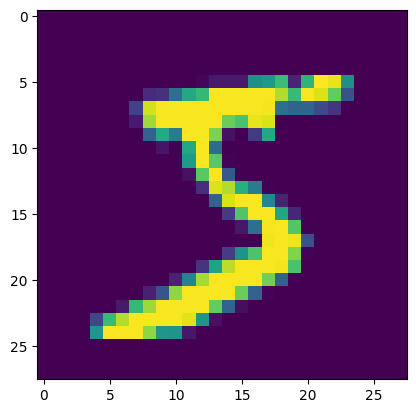

In [83]:
i = 0
layer_0 = training_images[i]
plt.imshow(layer_0.reshape(28, 28))

In [85]:
layer_0.shape, weights_1.shape

((784,), (784, 100))

In [86]:
layer_1 = np.dot(layer_0, weights_1)
layer_1.shape

(100,)

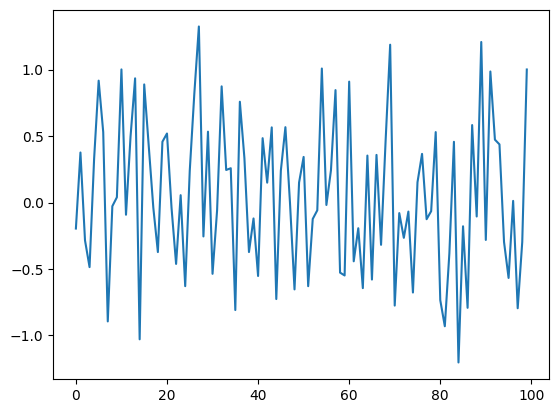

In [87]:
plt.plot(layer_1)

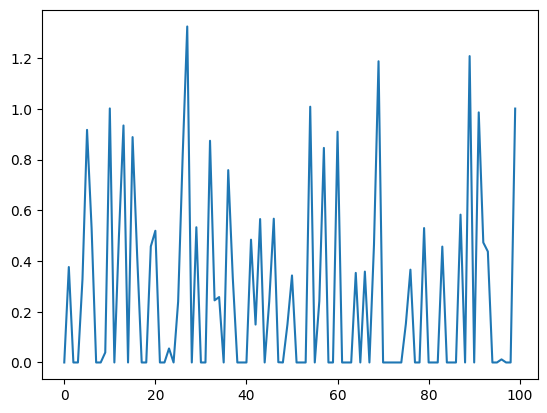

In [88]:
layer_1 = relu(layer_1)
plt.plot(layer_1)

In [92]:
dropout_mask = rng.integers(low=0, high=2, size=layer_1.shape)
dropout_mask.mean(), dropout_mask.shape

(0.49, (100,))

In [93]:
layer_1 *= dropout_mask * 2
layer_1

array([-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        6.57801455e-01,  1.83416310e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  2.00327574e+00, -0.00000000e+00,
        0.00000000e+00,  1.86888246e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.03852590e+00, -0.00000000e+00, -0.00000000e+00,  1.10458119e-01,
       -0.00000000e+00,  4.79480197e-01,  1.63509891e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.74819767e+00,  4.89925773e-01,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  6.67594838e-01, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  9.68328368e-01,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  4.80266441e-01,  1.13381490e+00,  2.04588090e-03,
       -0.00000000e+00,  3.00638779e-01,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [94]:
layer_1.shape, weights_2.shape

((100,), (100, 10))

In [95]:
layer_2 = np.dot(layer_1, weights_2)
layer_2.shape

(10,)

In [97]:
layer_2

array([ 0.73168022, -0.52747708, -0.07768195,  0.18274997,  0.32435873,
       -0.06825148,  0.42998577,  0.16880559, -0.22862777,  0.12499852])

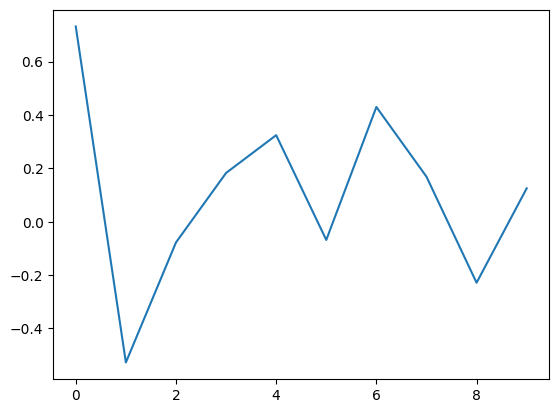

In [96]:
plt.plot(layer_2)

In [99]:
training_labels[i]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [104]:
(training_labels[i] - layer_2) ** 2

array([0.53535595, 0.27823207, 0.00603449, 0.03339755, 0.10520859,
       1.14116122, 0.18488776, 0.02849533, 0.05227066, 0.01562463])

In [105]:
# 오
training_loss = 0.0
training_loss += np.sum((training_labels[i] - layer_2) ** 2)
training_loss

2.3806682468926477

In [106]:
# 예측값
np.argmax(layer_2)

0

In [107]:
# 실제값
np.argmax(training_labels[i])

5

In [108]:
np.argmax(layer_2) == np.argmax(training_labels[i])

False

In [109]:
test_images.shape

(1000, 784)

In [110]:
weights_1.shape

(784, 100)

In [111]:
weights_2.shape

(100, 10)

In [112]:
results = relu(test_images @ weights_1) @ weights_2

In [118]:
np.argmax(test_labels[0])

7

In [117]:
np.argmax(results[0])

7

In [120]:
np.argmax(test_labels, axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6,
       4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5,
       7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9,
       8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7,
       9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2,
       6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4,

In [122]:
np.sum(np.argmax(test_labels, axis=1) == np.argmax(results, axis=1))

92

In [124]:
np.mean(np.argmax(test_labels, axis=1) == np.argmax(results, axis=1)) * 100

9.2

In [125]:
# To store training and test set losses and accurate predictions
# for visualization.
store_training_loss = []
store_training_accurate_pred = []
store_test_loss = []
store_test_accurate_pred = []

# This is a training loop.
# Run the learning experiment for a defined number of epochs (iterations).
for j in range(epochs):

    #################
    # 훈련 단계 #
    #################

    # 초기 손실/오차와 정확한 예측 수를 0으로 설정합니다.
    training_loss = 0.0
    training_accurate_predictions = 0

    # 훈련 이미지 전체에 대해 순전파를 수행하고
    # 역전파를 수행하고 가중치를 조정합니다.
    for i in range(len(training_images)):
        # 순전파:
        # 1. 입력 계층:
        #    훈련 이미지 데이터를 입력으로 초기화합니다.
        layer_0 = training_images[i]
        # 2. 은닉 계층:
        #    무작위로 초기화된 가중치에 의해 행렬 곱셈을 수행하여
        #    중간 계층에 훈련 이미지 데이터를 가져옵니다.
        layer_1 = np.dot(layer_0, weights_1)
        # 3. 은닉 계층의 출력을 ReLU 활성화 함수를 통과시킵니다.
        layer_1 = relu(layer_1)
        # 4. 정규화를 위한 드롭아웃 함수를 정의합니다.
        dropout_mask = rng.integers(low=0, high=2, size=layer_1.shape)
        # 5. 은닉 계층의 출력에 드롭아웃을 적용합니다.
        layer_1 *= dropout_mask * 2
        # 6. 출력 계층:
        #    중간 계층의 출력을 최종 계층에 가져와서
        #    무작위로 초기화된 가중치에 의해 행렬 곱셈을 수행합니다.
        #    10개의 점수가 있는 10차원 벡터를 생성합니다.
        layer_2 = np.dot(layer_1, weights_2)

        # 역전파:
        # 1. 실제 이미지 레이블(진실)과 모델의 예측 사이의
        #    훈련 오류(손실 함수)를 측정합니다.
        training_loss += np.sum((training_labels[i] - layer_2) ** 2)
        # 2. 정확한 예측 수를 증가시킵니다.
        training_accurate_predictions += int(
            np.argmax(layer_2) == np.argmax(training_labels[i])
        )
        # 3. 손실 함수/오차의 기울기를 구합니다.
        layer_2_delta = training_labels[i] - layer_2
        # 4. 손실 함수의 기울기를 은닉 계층을 통해 역전파합니다.
        layer_1_delta = np.dot(weights_2, layer_2_delta) * relu2deriv(layer_1)
        # 5. 기울기에 드롭아웃을 적용합니다.
        layer_1_delta *= dropout_mask
        # 6. 중간 및 입력 계층의 가중치를 업데이트합니다
        #    학습률과 기울기를 곱하여 업데이트합니다.
        weights_1 += learning_rate * np.outer(layer_0, layer_1_delta)
        weights_2 += learning_rate * np.outer(layer_1, layer_2_delta)

    # 훈련 세트의 손실과 정확한 예측을 저장합니다.
    store_training_loss.append(training_loss)
    store_training_accurate_pred.append(training_accurate_predictions)

    ###################
    # 평가 단계 #
    ###################

    # 각 에포크에서 테스트 세트에 대한 모델 성능을 평가합니다.

    # 훈련 단계와 달리, 각 이미지(또는 배치)에 대해 가중치가 수정되지 않습니다.
    # 따라서 모델을 테스트 이미지에 벡터화 방식으로 적용할 수 있으므로,
    # 각 이미지에 대해 개별적으로 루프를 돌릴 필요가 없습니다:

    results = relu(test_images @ weights_1) @ weights_2

    # 실제 레이블(진실)과 예측 값 사이의 오차를 측정합니다.
    test_loss = np.sum((test_labels - results) ** 2)

    # 테스트 세트에서의 예측 정확도를 측정합니다
    test_accurate_predictions = np.sum(
        np.argmax(results, axis=1) == np.argmax(test_labels, axis=1)
    )

    # 테스트 세트의 손실과 정확한 예측을 저장합니다.
    store_test_loss.append(test_loss)
    store_test_accurate_pred.append(test_accurate_predictions)


    # Summarize error and accuracy metrics at each epoch
    print(
        (
            f"Epoch: {j}\n"
            f"  Training set error: {training_loss / len(training_images):.3f}\n"
            f"  Training set accuracy: {training_accurate_predictions / len(training_images)}\n"
            f"  Test set error: {test_loss / len(test_images):.3f}\n"
            f"  Test set accuracy: {test_accurate_predictions / len(test_images)}"
        )
    )

Epoch: 0
  Training set error: 0.882
  Training set accuracy: 0.419
  Test set error: 0.669
  Test set accuracy: 0.581
Epoch: 1
  Training set error: 0.664
  Training set accuracy: 0.608
  Test set error: 0.618
  Test set accuracy: 0.613
Epoch: 2
  Training set error: 0.598
  Training set accuracy: 0.664
  Test set error: 0.576
  Test set accuracy: 0.66
Epoch: 3
  Training set error: 0.560
  Training set accuracy: 0.713
  Test set error: 0.544
  Test set accuracy: 0.683
Epoch: 4
  Training set error: 0.519
  Training set accuracy: 0.741
  Test set error: 0.518
  Test set accuracy: 0.705
Epoch: 5
  Training set error: 0.515
  Training set accuracy: 0.706
  Test set error: 0.504
  Test set accuracy: 0.736
Epoch: 6
  Training set error: 0.498
  Training set accuracy: 0.751
  Test set error: 0.497
  Test set accuracy: 0.73
Epoch: 7
  Training set error: 0.469
  Training set accuracy: 0.772
  Test set error: 0.478
  Test set accuracy: 0.749
Epoch: 8
  Training set error: 0.473
  Training se

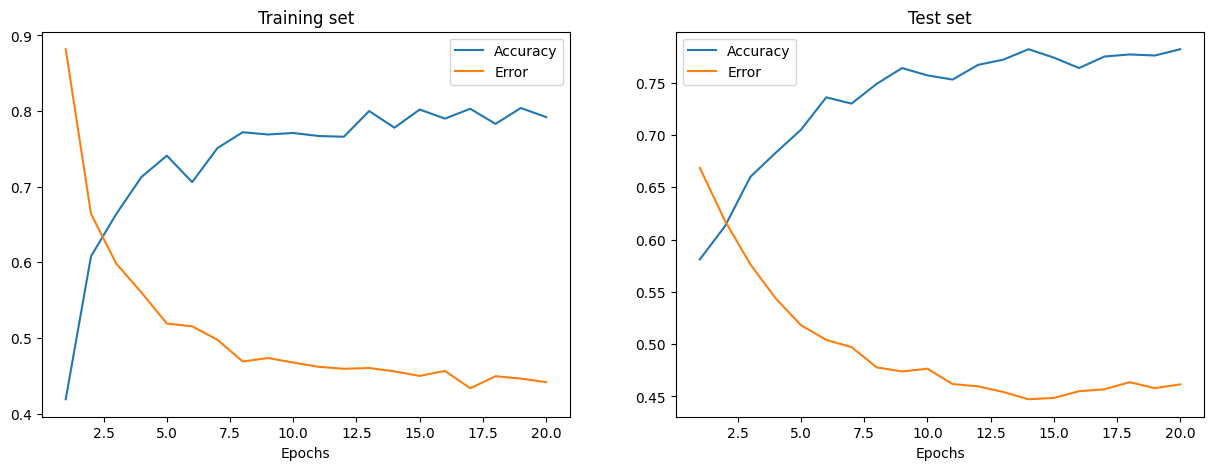

In [126]:
epoch_range = np.arange(epochs) + 1  # Starting from 1

# The training set metrics.
training_metrics = {
    "accuracy": np.asarray(store_training_accurate_pred) / len(training_images),
    "error": np.asarray(store_training_loss) / len(training_images),
}

# The test set metrics.
test_metrics = {
    "accuracy": np.asarray(store_test_accurate_pred) / len(test_images),
    "error": np.asarray(store_test_loss) / len(test_images),
}

# Display the plots.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, metrics, title in zip(
    axes, (training_metrics, test_metrics), ("Training set", "Test set")
):
    # Plot the metrics
    for metric, values in metrics.items():
        ax.plot(epoch_range, values, label=metric.capitalize())
    ax.set_title(title)
    ax.set_xlabel("Epochs")
    ax.legend()
plt.show()